# Imports

In [3]:
import numpy as np
import tensorflow as tf
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from utils import shuffle_batch, variable_summaries
import os

%matplotlib notebook

dir_path = os.getcwd()

now = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)
print(dir_path)
print(now)

C:\Users\kicjo\Desktop\my-anns\nuclei\nuclei-updated-multioutput
2019-08-18-19-46-57


In [4]:
#%matplotlib notebook

# Read the data set

In [5]:
df = pd.read_csv("better-nuclei-added-output.csv")
print(df.info())
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 5 columns):
Z                    3436 non-null int64
N                    3436 non-null int64
Mass Excess [MeV]    3436 non-null float64
Error                3436 non-null float64
Estimated            3436 non-null int64
dtypes: float64(2), int64(3)
memory usage: 134.3 KB
None


Index(['Z', 'N', 'Mass Excess [MeV]', 'Error', 'Estimated'], dtype='object')

In [6]:
df = df.rename(columns={"Mass Excess [MeV]": "d", "Z":'z', 'N':'n',"Error":"error", "Estimated":"estimated"})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 5 columns):
z            3436 non-null int64
n            3436 non-null int64
d            3436 non-null float64
error        3436 non-null float64
estimated    3436 non-null int64
dtypes: float64(2), int64(3)
memory usage: 134.3 KB
None


In [7]:
not_estimated_filter = (df["estimated"] == 0)
df = df[not_estimated_filter]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 3369
Data columns (total 5 columns):
z            2498 non-null int64
n            2498 non-null int64
d            2498 non-null float64
error        2498 non-null float64
estimated    2498 non-null int64
dtypes: float64(2), int64(3)
memory usage: 117.1 KB


In [9]:
df.isnull().values.any()

False

In [10]:
df['z'].shape

(2498,)

In [11]:
df.count()

z            2498
n            2498
d            2498
error        2498
estimated    2498
dtype: int64

# Adding made up second output columns 

In [12]:
n_rows = df['z'].count()
made_up_values = np.sin(np.linspace(-2 * np.pi, 2 * np.pi, n_rows))
df["d2"] = made_up_values
df.head()

,z,n,d,error,estimated,d2
0,0,1,8.071317,4.000000e-07,0,2.449294e-16
1,1,0,7.288971,0.000000e+00,0,5.032566e-03
2,1,1,13.135722,1.000000e-07,0,1.006500e-02
3,1,2,14.949810,2.000000e-07,0,1.509719e-02
4,1,3,24.621127,1.000000e-01,0,2.012899e-02


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 3369
Data columns (total 6 columns):
z            2498 non-null int64
n            2498 non-null int64
d            2498 non-null float64
error        2498 non-null float64
estimated    2498 non-null int64
d2           2498 non-null float64
dtypes: float64(3), int64(3)
memory usage: 136.6 KB


In [14]:
df.describe()

,z,n,d,error,estimated,d2
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.0,2.498000e+03
mean,55.147318,76.921938,-38.170108,0.030566,0.0,5.029192e-17
std,25.930144,39.514909,42.841058,0.094224,0.0,7.071068e-01
min,0.000000,0.000000,-91.652853,0.000000,0.0,-9.999998e-01
25%,35.000000,46.000000,-71.626161,0.001787,0.0,-7.066617e-01
50%,56.000000,78.000000,-51.437714,0.006845,0.0,0.000000e+00
75%,78.000000,107.000000,-11.567731,0.019962,0.0,7.066617e-01
max,110.000000,160.000000,134.834709,1.336694,0.0,9.999998e-01


# Plot made up column

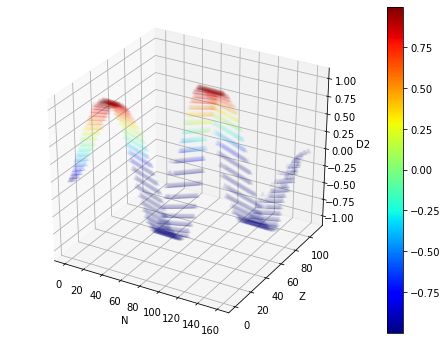

In [15]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection='3d')

xs = df['n']
ys = df['z']
zs = df['d2']

colmap = cm.ScalarMappable(cmap=cm.get_cmap("jet"))
colmap.set_array(zs)

yg = ax.scatter(xs, ys, zs, c=cm.get_cmap("jet")(zs/max(zs)), marker='^',alpha=0.05)
cb = fig.colorbar(colmap)

ax.set_xlabel('N')
ax.set_ylabel('Z')
ax.set_zlabel('D2')


plt.show()

In [16]:
df['d2'].to_numpy().shape

(2498,)

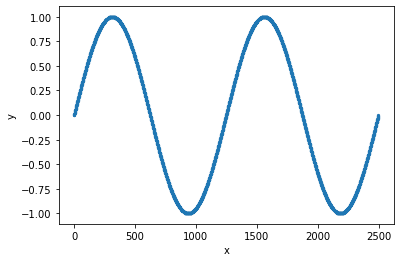

In [17]:
plt.scatter(range(df['d2'].count()), df['d2'].to_numpy(), s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

# Dividing Mass Excess by A = Z + N

In [18]:
zes = df['z'].to_numpy()
ns = df['n'].to_numpy()
a = zes + ns

des = df['d'].to_numpy() / a
df['d'] = des


# Plot first output column

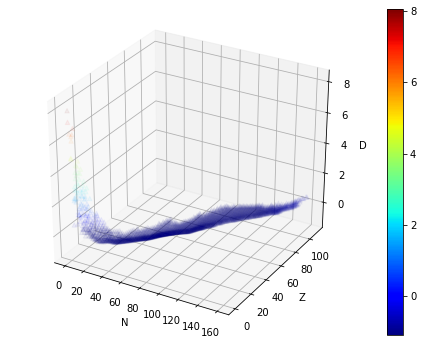

In [19]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection='3d')

xs = df['n']
ys = df['z']
zs = df['d']

colmap = cm.ScalarMappable(cmap=cm.get_cmap("jet"))
colmap.set_array(zs)

yg = ax.scatter(xs, ys, zs, c=cm.get_cmap("jet")(zs/max(zs)), marker='^',alpha=0.05)
cb = fig.colorbar(colmap)

ax.set_xlabel('N')
ax.set_ylabel('Z')
ax.set_zlabel('D')


plt.show()

# Tripcolor

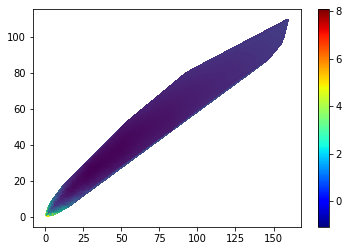

In [20]:
zs = df['d']

colmap = cm.ScalarMappable(cmap=cm.get_cmap("jet"))
colmap.set_array(zs)

#yg = ax.scatter(xs, ys, zs, c=cm.get_cmap("jet")(zs/max(zs)), marker='^',alpha=0.05)


fig, (ax)=plt.subplots(ncols=1)
ax.tripcolor(df["n"], df["z"], df["d"])
cb = fig.colorbar(colmap)

plt.show()

# Set X inputs

In [21]:
x = df.drop(['d','d2',"error","estimated"], axis='columns')
print(x.info())
x = x.to_numpy()
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 3369
Data columns (total 2 columns):
z    2498 non-null int64
n    2498 non-null int64
dtypes: int64(2)
memory usage: 58.5 KB
None
(2498, 2)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 3369
Data columns (total 6 columns):
z            2498 non-null int64
n            2498 non-null int64
d            2498 non-null float64
error        2498 non-null float64
estimated    2498 non-null int64
d2           2498 non-null float64
dtypes: float64(3), int64(3)
memory usage: 136.6 KB


# Set Y inputs _(HERE CHANGE NUMBER OF INPUTS AND RESHAPE)

In [23]:
y = df[['d','d2']].to_numpy() #HERE
y.shape

(2498, 2)

In [24]:
y = y.reshape(-1,2) #HERE
y.shape

(2498, 2)

In [25]:
y[0:5]

array([[8.07131713e+00, 2.44929360e-16],
       [7.28897061e+00, 5.03256611e-03],
       [6.56786088e+00, 1.00650048e-02],
       [4.98326998e+00, 1.50971885e-02],
       [6.15528175e+00, 2.01289899e-02]])

# Prepare X_train_o, Y_train_o etc

In [69]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(x, y, test_size=0.2, random_state=1)
X_train_o, X_val_o, y_train_o, y_val_o  = train_test_split(X_train_o, y_train_o, test_size=0.2, random_state=1)
n_inputs = X_train_o.shape[1]
n_outputs = y_train_o.shape[1]
print(n_inputs)
print(n_outputs)
print(X_train_o.shape, X_test_o.shape,X_val_o.shape)

2
2
(1598, 2) (500, 2) (400, 2)


# Scaling

In [27]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train = x_scaler.fit_transform(X_train_o.reshape(-1, n_inputs))
X_test = x_scaler.transform(X_test_o.reshape(-1, n_inputs))
X_val = x_scaler.transform(X_val_o.reshape(-1, n_inputs))

y_train = y_scaler.fit_transform(y_train_o.reshape(-1, n_outputs))
y_test = y_scaler.transform(y_test_o.reshape(-1, n_outputs))
y_val = y_scaler.transform(y_val_o.reshape(-1, n_outputs))

n_inputs = X_train.shape[1]
n_outputs = y_train.shape[1]
print(n_inputs)
print(n_outputs)

2
2


# ANN TOPOLOGY

In [28]:
def cust_layer(inputs,number_of_neurons, name, activation=None, dropout=False):
    init = tf.initializers.he_normal(seed=None)
    hidden = tf.keras.layers.Dense(number_of_neurons,
                                   name=name,
                                    kernel_initializer=init,
                                   activation = activation,
                                   kernel_regularizer = tf.keras.regularizers.l2(l=0.1)
                                  )(inputs)
    
    batch_norm = tf.keras.layers.BatchNormalization()(hidden, training=True)
    
    if dropout:
        dropout_layer = tf.keras.layers.Dropout(0.5)(batch_norm)
        return dropout_layer
    else:
        return batch_norm
    
tf.reset_default_graph()
with tf.name_scope("dnn"):
    with tf.name_scope("inputs"):
        X_node = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
        y_node = tf.placeholder(tf.float32, shape=(None, n_outputs), name="y")
    
    
 
    last_layer = cust_layer(X_node,20,"hidden1")
    
    n_layers = 3
    
    for i in range(n_layers):
        is_odd = False
            
        last_layer = cust_layer(last_layer,70,"hidden"+str(i),activation=tf.nn.elu,dropout=True)
   
    init = tf.initializers.he_normal(seed=None)    
    y_pred = tf.keras.layers.Dense(n_outputs, name="output",
                                   kernel_initializer=init)(last_layer)

#TO BE FIXED
# with tf.name_scope('MSE_combined'):    
#     error = y_pred - y_node
#     print(error.get_shape())    
#     square = tf.square(error)
#     print(square.get_shape())    
#     summed = tf.reshape(tf.math.reduce_sum(error,1),[-1,1])
#     print(summed.get_shape())
#     mse = tf.reduce_mean(summed, name="mse")
#     print(mse.get_shape())    
#     variable_summaries(mse)

    
with tf.name_scope('MSE_first_output'):
    error_f = y_pred[:,0] - y_node[:,0]
    square_f = tf.square(error_f)
    mse_f = tf.reduce_mean(square_f, name="mse_first")
    variable_summaries(mse_f)
    print(error_f.get_shape())

with tf.name_scope('MSE_second_output'):
    error_s = y_pred[:,1] - y_node[:,1]
    square_s = tf.square(error_s)
    mse_s = tf.reduce_mean(square_s, name="mse_second")
    variable_summaries(mse_s)

with tf.name_scope('MSE_combined'):
    mse = mse_f + mse_s
    variable_summaries(mse)

with tf.name_scope('optimiser'):
    optimiser = tf.train.AdamOptimizer(0.01)
    training_op = optimiser.minimize(mse)

for var in tf.trainable_variables():
    tf.summary.histogram(var.name, var)

W0818 19:47:20.862779 19020 deprecation_wrapper.py:119] From C:\Users\kicjo\Desktop\my-anns\nuclei\nuclei-updated-multioutput\utils.py:16: The name tf.summary.scalar is deprecated. Please use tf.compat.v1.summary.scalar instead.

W0818 19:47:20.875749 19020 deprecation_wrapper.py:119] From C:\Users\kicjo\Desktop\my-anns\nuclei\nuclei-updated-multioutput\utils.py:22: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.



(?,)


# File writers

In [29]:
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter(logdir + '/train', tf.get_default_graph())
test_writer = tf.summary.FileWriter(logdir + '/test')
valid_writer = tf.summary.FileWriter(logdir + '/valid')
init = tf.global_variables_initializer()

saver = tf.train.Saver()

checkpoint_path = os.path.join(dir_path, "sinus_tmp","sinus_full_model.ckpt")
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = os.path.join(dir_path, "model", "my_sinus_full_model")

# Number of epochs and batches

In [30]:
n_epochs = 600
n_batches = 50

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = n_epochs * 0.2
print(max_epochs_without_progress)



120.0


# Training

In [31]:
with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, n_batches):
            summary, _ = sess.run([merged, training_op],
                                  feed_dict={X_node: X_batch, y_node: y_batch})

        train_summary, _ = sess.run([merged, training_op],feed_dict={X_node: X_train, y_node: y_train})
        test_summary, _ =sess.run([merged, training_op],feed_dict={X_node: X_test, y_node: y_test})
        validation_summary, _ = sess.run([merged, training_op], feed_dict={X_node: X_val, y_node: y_val})

        train_writer.add_summary(train_summary, epoch)
        test_writer.add_summary(test_summary, epoch)
        valid_writer.add_summary(validation_summary,epoch)

        loss_train = mse.eval(feed_dict={X_node: X_train, y_node: y_train})
        loss_val = mse.eval(feed_dict={X_node: X_val, y_node: y_val})
        print(epoch, "train loss:", loss_train, "valid loss:", loss_val)

        iteration_skip = 10
        if epoch % iteration_skip == 0:
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))

        if loss_val < best_loss:
            saver.save(sess, final_model_path)
            best_loss = loss_val
            print("best loss:", best_loss)
            epochs_without_progress = 0
        else:
            epochs_without_progress += 1
            if epochs_without_progress > max_epochs_without_progress:
                print("Early stopping")
                break


train_writer.close()
test_writer.close()
valid_writer.close()

0 train loss: 0.5726435 valid loss: 0.6232989
best loss: 0.6232989
1 train loss: 0.5059447 valid loss: 0.47603127
best loss: 0.47603127
2 train loss: 0.47075653 valid loss: 0.4250527
best loss: 0.4250527
3 train loss: 0.4244219 valid loss: 0.39474058
best loss: 0.39474058
4 train loss: 0.2939232 valid loss: 0.2566812
best loss: 0.2566812
5 train loss: 0.5067219 valid loss: 0.47511756
6 train loss: 0.38714445 valid loss: 0.4394248
7 train loss: 0.3246295 valid loss: 0.3526715
8 train loss: 0.23787063 valid loss: 0.23343378
best loss: 0.23343378
9 train loss: 0.34146926 valid loss: 0.32036245
10 train loss: 0.21814403 valid loss: 0.19435945
best loss: 0.19435945
11 train loss: 0.25260034 valid loss: 0.23252821
12 train loss: 0.30615383 valid loss: 0.33167532
13 train loss: 0.30128196 valid loss: 0.27942124
14 train loss: 0.23736499 valid loss: 0.2915109
15 train loss: 0.32007614 valid loss: 0.34076303
16 train loss: 0.23426564 valid loss: 0.23114645
17 train loss: 0.16778639 valid loss: 

163 train loss: 0.157582 valid loss: 0.1504344
164 train loss: 0.13745525 valid loss: 0.13484697
165 train loss: 0.1462421 valid loss: 0.14521846
166 train loss: 0.1759418 valid loss: 0.17554992
167 train loss: 0.1606424 valid loss: 0.1758421
168 train loss: 0.13347962 valid loss: 0.11834941
169 train loss: 0.17103352 valid loss: 0.15719037
170 train loss: 0.1453786 valid loss: 0.14559661
171 train loss: 0.13439286 valid loss: 0.13784237
172 train loss: 0.16142842 valid loss: 0.18836233
173 train loss: 0.21351221 valid loss: 0.19786617
174 train loss: 0.22773123 valid loss: 0.20076974
175 train loss: 0.124172874 valid loss: 0.11051142
176 train loss: 0.17836344 valid loss: 0.17201404
177 train loss: 0.1131863 valid loss: 0.1108364
178 train loss: 0.14172712 valid loss: 0.14414772
179 train loss: 0.20988709 valid loss: 0.19271657
180 train loss: 0.11998673 valid loss: 0.11608906
181 train loss: 0.1264119 valid loss: 0.13112748
182 train loss: 0.29975885 valid loss: 0.35244596
183 train 

In [32]:
os.remove(checkpoint_epoch_path)

# Predictions

In [33]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    test_mse = mse.eval(feed_dict={X_node: X_test, y_node: y_test})
    predictions = y_pred.eval(feed_dict={X_node: X_test, y_node: y_test})
    
    
print(test_mse)

W0818 19:48:00.245895 19020 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


0.13033837


In [34]:
predictions.shape

(500, 2)

# Plot  _first (0th)_ output column of _predictions_

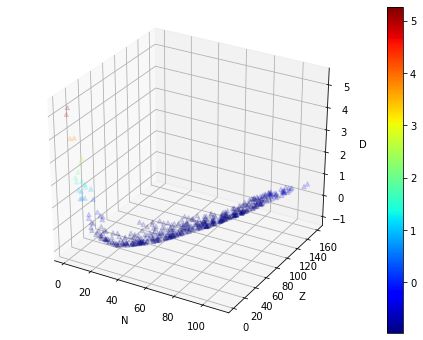

In [35]:
y_new_inverse = y_scaler.inverse_transform(predictions)
x_test_inverse = x_scaler.inverse_transform(X_test)

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection='3d')

xs = x_test_inverse[:,0]
ys = x_test_inverse[:,1]
zs = y_new_inverse[:,0]

colmap = cm.ScalarMappable(cmap=cm.get_cmap("jet"))
colmap.set_array(zs)

yg = ax.scatter(xs, ys, zs, c=cm.get_cmap("jet")(zs/max(zs)), marker='^',alpha=0.15)
cb = fig.colorbar(colmap)

ax.set_xlabel('N')
ax.set_ylabel('Z')
ax.set_zlabel('D')


plt.show()

In [36]:
y_test_o.shape[0]


500

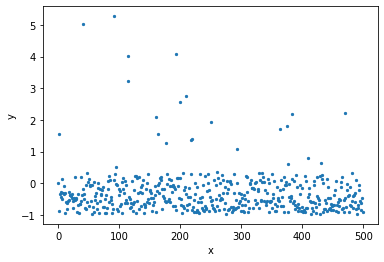

In [37]:
plt.scatter(range(y_new_inverse.shape[0]), y_new_inverse[:,0], s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

# Plot _first 0th_ column of TEST set

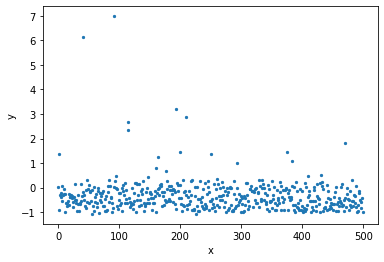

In [38]:
plt.scatter(range(y_test_o.shape[0]), y_test_o[:,0], s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

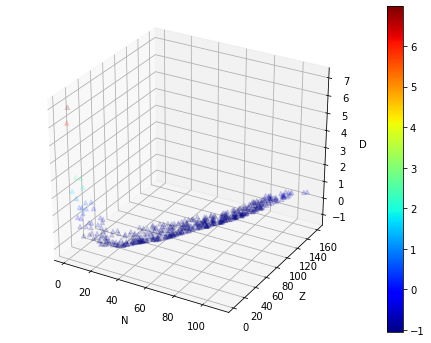

In [39]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection='3d')

xs = X_test_o[:,0]
ys = X_test_o[:,1]
zs = y_test_o[:,0]

colmap = cm.ScalarMappable(cmap=cm.get_cmap("jet"))
colmap.set_array(zs)

yg = ax.scatter(xs, ys, zs, c=cm.get_cmap("jet")(zs/max(zs)), marker='^',alpha=0.15)
cb = fig.colorbar(colmap)

ax.set_xlabel('N')
ax.set_ylabel('Z')
ax.set_zlabel('D')


plt.show()

# Plot second column of Predictions 

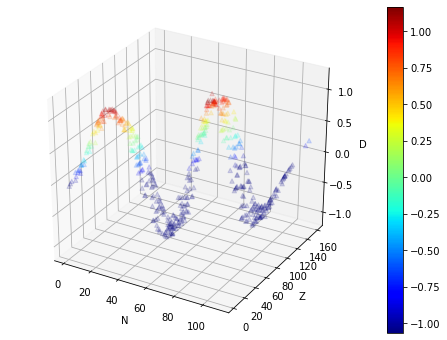

In [40]:
y_new_inverse = y_scaler.inverse_transform(predictions)
x_test_inverse = x_scaler.inverse_transform(X_test)

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection='3d')

xs = x_test_inverse[:,0]
ys = x_test_inverse[:,1]
zs = y_new_inverse[:,1]

colmap = cm.ScalarMappable(cmap=cm.get_cmap("jet"))
colmap.set_array(zs)

yg = ax.scatter(xs, ys, zs, c=cm.get_cmap("jet")(zs/max(zs)), marker='^',alpha=0.15)
cb = fig.colorbar(colmap)

ax.set_xlabel('N')
ax.set_ylabel('Z')
ax.set_zlabel('D')


plt.show()

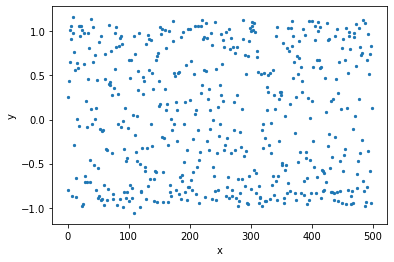

In [41]:
plt.scatter(range(y_new_inverse.shape[0]), y_new_inverse[:,1], s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

# Plot second column of TEST set

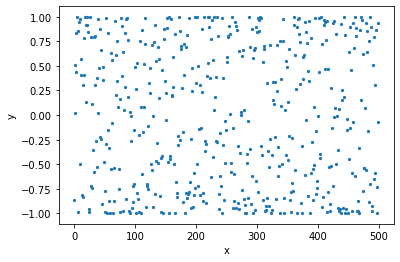

In [42]:
plt.scatter(range(y_test_o.shape[0]), y_test_o[:,1], s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

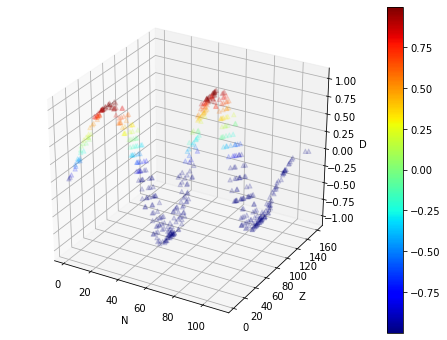

In [43]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection='3d')

xs = X_test_o[:,0]
ys = X_test_o[:,1]
zs = y_test_o[:,1]

colmap = cm.ScalarMappable(cmap=cm.get_cmap("jet"))
colmap.set_array(zs)

yg = ax.scatter(xs, ys, zs, c=cm.get_cmap("jet")(zs/max(zs)), marker='^',alpha=0.15)
cb = fig.colorbar(colmap)

ax.set_xlabel('N')
ax.set_ylabel('Z')
ax.set_zlabel('D')


plt.show()

# Get the error for X_test_o set

In [44]:
test_df = pd.DataFrame(data=X_test_o)
test_df = test_df.rename(columns={ 0: "z", 1: "n" })
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
z    500 non-null int64
n    500 non-null int64
dtypes: int64(2)
memory usage: 7.9 KB


In [45]:
merged_df = pd.merge(df,test_df, on=['z','n'],how="right")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 6 columns):
z            500 non-null int64
n            500 non-null int64
d            500 non-null float64
error        500 non-null float64
estimated    500 non-null int64
d2           500 non-null float64
dtypes: float64(3), int64(3)
memory usage: 27.3 KB


In [46]:
merged_df.head()

,z,n,d,error,estimated,d2
0,1,3,6.155282,0.100000,0,0.020129
1,1,5,6.979287,0.254127,0,0.030191
2,3,3,2.347813,0.000001,0,0.085450
3,4,7,1.834288,0.000238,0,0.150405
4,5,6,0.787973,0.000012,0,0.199947


# Set the error to 1 if smaller then 1

In [47]:
merged_df['error'] = merged_df['error'].apply(lambda y: y if y > 1 else 1)

In [48]:
error_vals = merged_df['error'].to_numpy().reshape(-1,1)

In [49]:
error_vals.shape

(500, 1)

In [50]:
print(y_new_inverse.shape)
print(y_test_o.shape)
print(error_vals.shape)

(500, 2)
(500, 2)
(500, 1)


# Calculate _diff_ and _diff_abs_ (no distinction for columns)

In [51]:

diff = np.square((y_new_inverse - y_test_o) / y_test_o)
diff_abs = y_new_inverse - y_test_o
print(diff.shape)
print(diff[:5])
reshaped_diff = diff.reshape(-1,1)[:,0]
print(reshaped_diff.shape)
print(reshaped_diff[:5])

(500, 2)
[[7.75583302e-02 5.35033161e-03]
 [1.13262444e-03 1.20214581e+02]
 [1.30798486e-02 2.44143750e-02]
 [8.99941121e-03 5.23047811e-02]
 [3.33066890e-02 2.52663339e-01]]
(1000,)
[7.75583302e-02 5.35033161e-03 1.13262444e-03 1.20214581e+02
 1.30798486e-02]


In [52]:
diff_df = pd.DataFrame(data={'diff': reshaped_diff})
diff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
diff    1000 non-null float64
dtypes: float64(1)
memory usage: 7.9 KB


In [53]:
diff_df.isnull().values.any()

False

In [54]:
diff_df.max()

diff    19341.838328
dtype: float64

In [55]:
diff_df.describe()

,diff
count,1.000000e+03
mean,4.102620e+01
std,7.213876e+02
min,5.010491e-11
25%,2.822621e-03
50%,1.783453e-02
75%,1.130570e-01
max,1.934184e+04


# Plot the relative diff of the first column

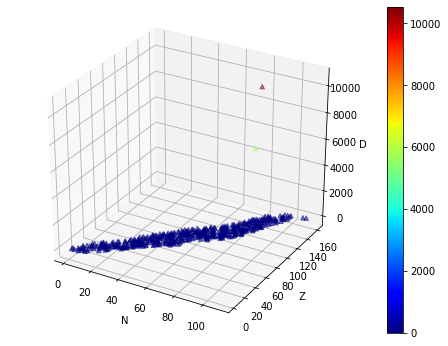

In [56]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,projection='3d')

xs = x_test_inverse[:,0]
ys = x_test_inverse[:,1]
zs = diff[:,0]

colmap = cm.ScalarMappable(cmap=cm.get_cmap("jet"))
colmap.set_array(zs)

yg = ax.scatter(xs, ys, zs, c=cm.get_cmap("jet")(zs/max(zs)), marker='^',alpha=0.5)
cb = fig.colorbar(colmap)

ax.set_xlabel('N')
ax.set_ylabel('Z')
ax.set_zlabel('D')


plt.show()

In [57]:
range_x = x_test_inverse.shape[0]
range_x

500

In [58]:
iterate_x = list(range(0,range_x))
len(iterate_x)

500

In [59]:
diff[:,0].shape

(500,)

In [60]:
temp = pd.DataFrame(data=diff[:,0])
temp.describe()

,0
count,5.000000e+02
mean,3.355626e+01
std,5.325003e+02
min,5.010491e-11
25%,1.232940e-03
50%,7.466172e-03
75%,4.164439e-02
max,1.052764e+04


In [70]:
#%matplotlib notebook

<IPython.core.display.Javascript object>


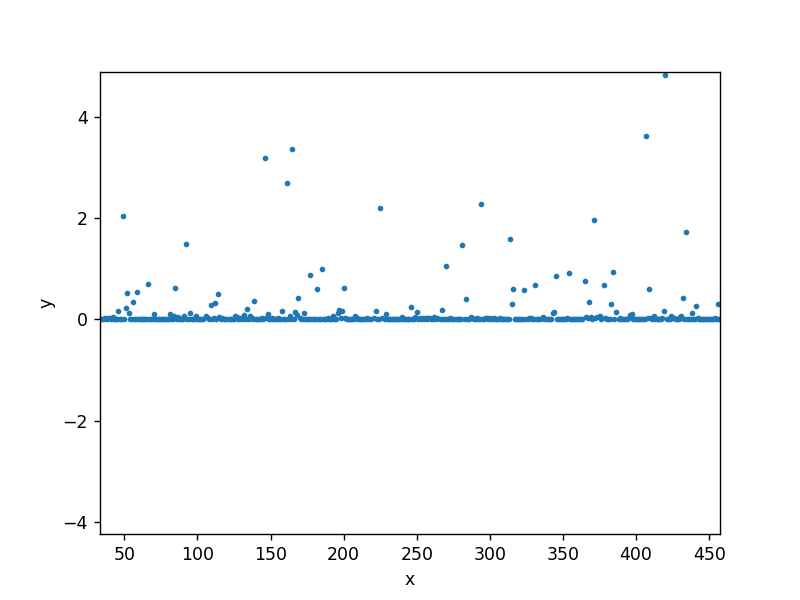

In [71]:
plt.scatter(iterate_x, diff[:,0], s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

In [63]:
diff_df.describe()

,diff
count,1.000000e+03
mean,4.102620e+01
std,7.213876e+02
min,5.010491e-11
25%,2.822621e-03
50%,1.783453e-02
75%,1.130570e-01
max,1.934184e+04


# Plot the relative diff of the second column

In [64]:
temp2 = pd.DataFrame(data=diff[:,1])
temp2.describe()

,0
count,5.000000e+02
mean,4.849614e+01
std,8.707323e+02
min,3.921638e-07
25%,7.712899e-03
50%,4.365825e-02
75%,1.880552e-01
max,1.934184e+04


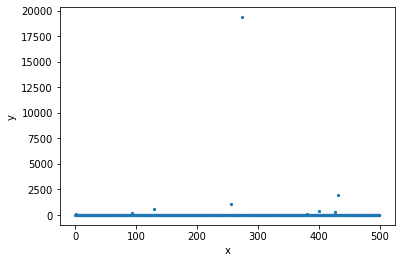

In [65]:
plt.scatter(iterate_x, diff[:,1], s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

# Diff ABSOLUTE of first column

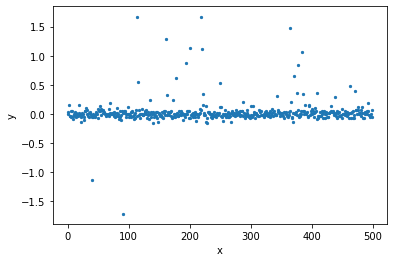

In [66]:
plt.scatter(iterate_x, diff_abs[:,0], s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

# Diff ABSOLUTE of second column

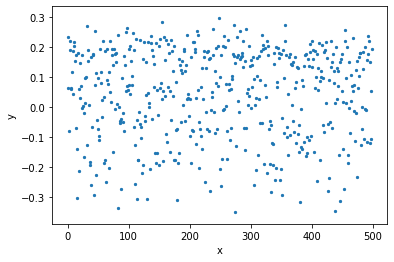

In [67]:
plt.scatter(iterate_x, diff_abs[:,1], s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()